In [107]:
# Import libaries

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
from shapely.geometry import Point, LineString, Polygon
import seaborn

In [2]:
data = gpd.read_file("/Users/gaurishlakhanpal/Downloads/tl_2013_17031_roads/road.shx")

<AxesSubplot:>

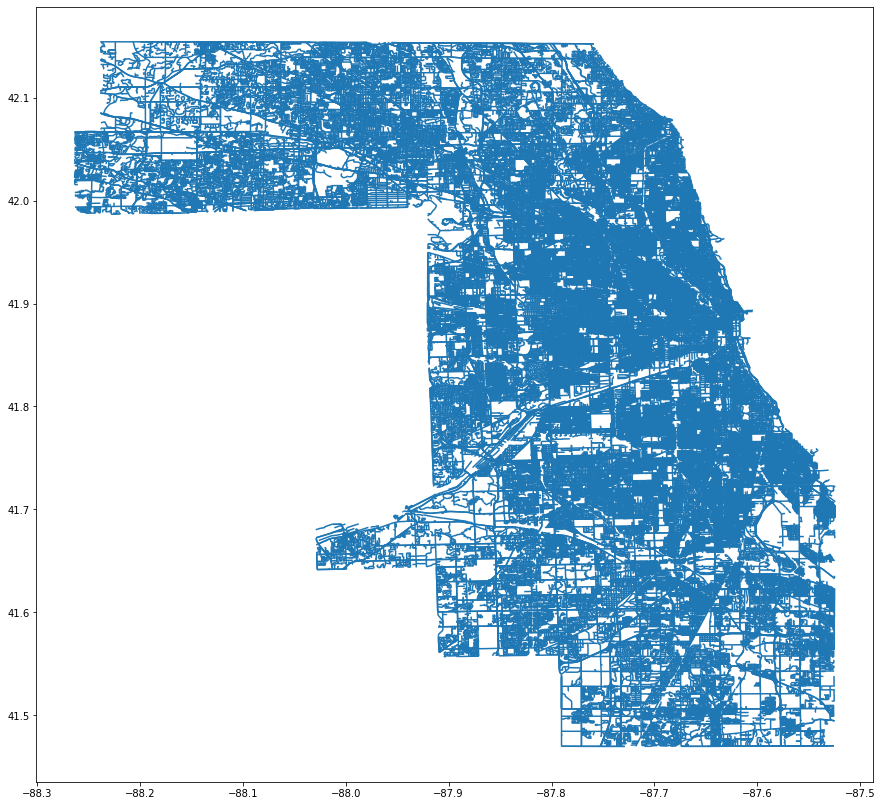

In [3]:
data.plot(figsize = (15, 15))

In [4]:
stations = gpd.read_file('/Users/gaurishlakhanpal/Downloads/stations.csv')

In [5]:
geom = []

for x in range(len(stations)):
    geom.append(Point(float(stations["LONGITUDE"][x]), float(stations["LATITUDE"][x])))

stations["geometry"] = geom

<AxesSubplot:>

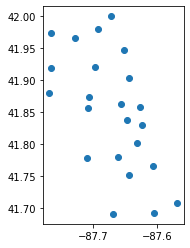

In [6]:
stations.plot()

<AxesSubplot:>

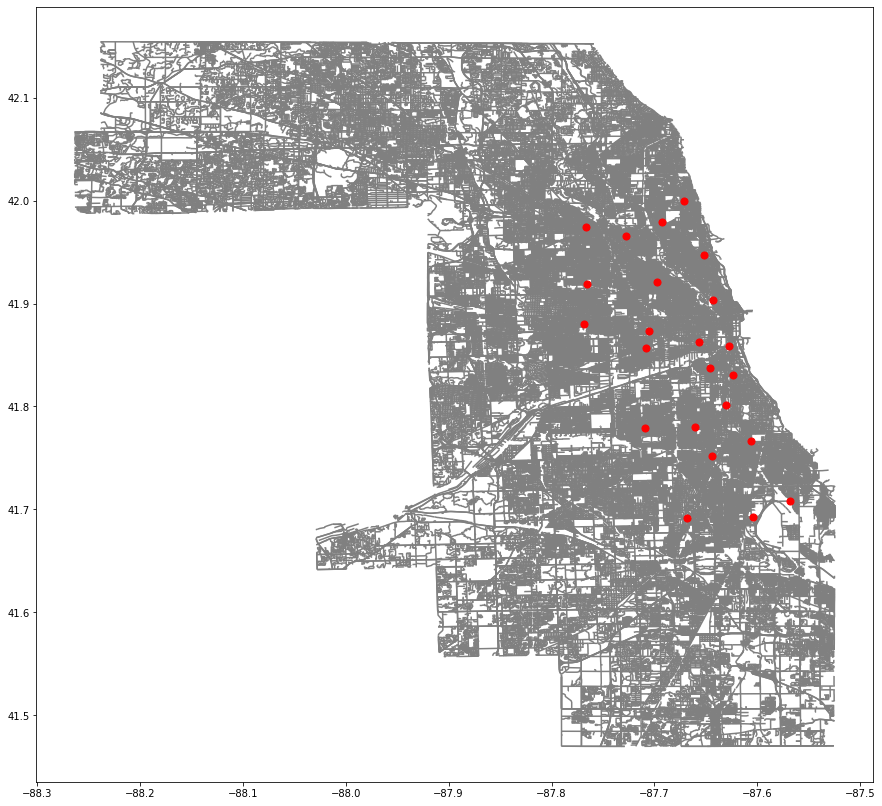

In [7]:
fig, ax = plt.subplots(figsize = (15, 15))

stations.plot(ax = ax, color = "red", markersize = 50, zorder = 10)
data.plot(ax = ax, color = "gray", zorder = 0)


In [8]:
# Let's make the grid with all the points and line strings now

splitx = []
splity = []

# Long: -88.3 to -87.5
# Lat: 41.4 to 42.2

# We will increment by .05

for x in range(0, 17):
    splitx.append(-87.5 + x*-.05)
    splity.append(round(41.4 + x*.05, 2))

In [9]:
splitx

[-87.5,
 -87.55,
 -87.6,
 -87.65,
 -87.7,
 -87.75,
 -87.8,
 -87.85,
 -87.9,
 -87.95,
 -88.0,
 -88.05,
 -88.1,
 -88.15,
 -88.2,
 -88.25,
 -88.3]

In [10]:
splity

[41.4,
 41.45,
 41.5,
 41.55,
 41.6,
 41.65,
 41.7,
 41.75,
 41.8,
 41.85,
 41.9,
 41.95,
 42.0,
 42.05,
 42.1,
 42.15,
 42.2]

In [11]:
allp = []
alll = []
for x in splity:
    for y in splitx:
        allp.append(Point(y, x))

In [12]:
grid = gpd.GeoDataFrame(allp, geometry = allp)

In [13]:
grid

0                    geometry
0                 POINT (-87.5 41.4)  POINT (-87.50000 41.40000)
1                POINT (-87.55 41.4)  POINT (-87.55000 41.40000)
2    POINT (-87.59999999999999 41.4)  POINT (-87.60000 41.40000)
3    POINT (-87.65000000000001 41.4)  POINT (-87.65000 41.40000)
4                 POINT (-87.7 41.4)  POINT (-87.70000 41.40000)
..                               ...                         ...
284  POINT (-88.09999999999999 42.2)  POINT (-88.10000 42.20000)
285  POINT (-88.15000000000001 42.2)  POINT (-88.15000 42.20000)
286               POINT (-88.2 42.2)  POINT (-88.20000 42.20000)
287              POINT (-88.25 42.2)  POINT (-88.25000 42.20000)
288               POINT (-88.3 42.2)  POINT (-88.30000 42.20000)

[289 rows x 2 columns]

<AxesSubplot:>

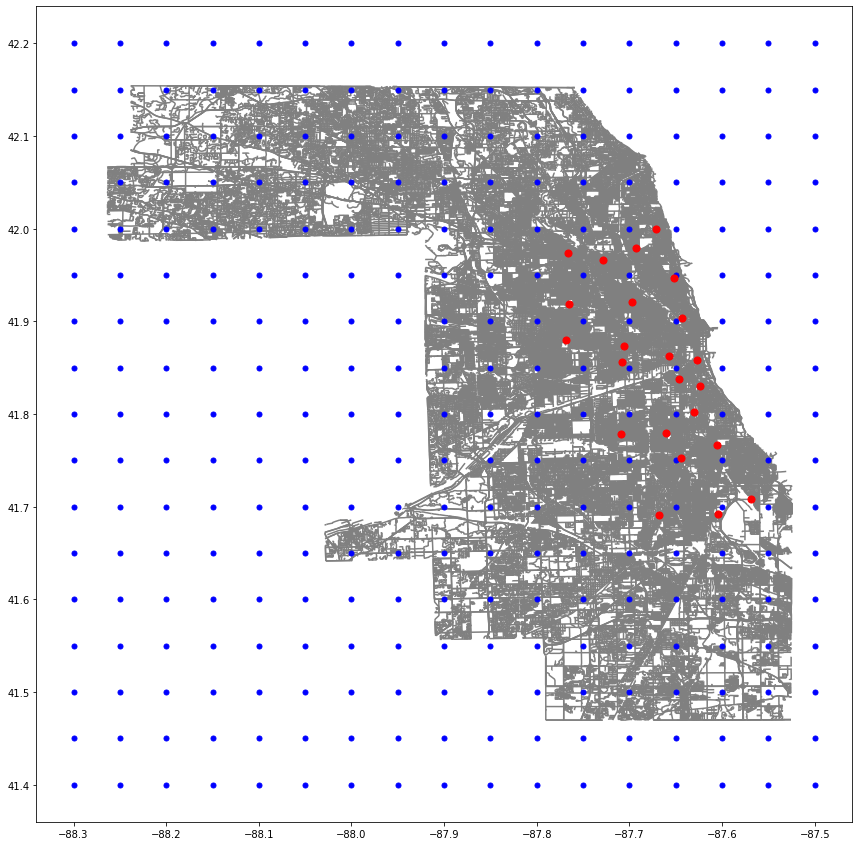

In [14]:
fig, ax = plt.subplots(figsize = (15, 15))

stations.plot(ax = ax, color = "red", markersize = 50, zorder = 10)
data.plot(ax = ax, color = "gray", zorder = 0)
grid.plot(ax = ax, color = "blue", zorder = 5, markersize = 25)

In [15]:
splitx

[-87.5,
 -87.55,
 -87.6,
 -87.65,
 -87.7,
 -87.75,
 -87.8,
 -87.85,
 -87.9,
 -87.95,
 -88.0,
 -88.05,
 -88.1,
 -88.15,
 -88.2,
 -88.25,
 -88.3]

In [16]:
splity

[41.4,
 41.45,
 41.5,
 41.55,
 41.6,
 41.65,
 41.7,
 41.75,
 41.8,
 41.85,
 41.9,
 41.95,
 42.0,
 42.05,
 42.1,
 42.15,
 42.2]

In [17]:
# Let's make the line strings

lines = []

xtemp = [-87.5, -88.3]
ytemp = [41.4, 42.2]

for y in splity:
    lines.append(LineString([Point(xtemp[1], y), Point(xtemp[0], y)]))

for x in splitx:
    lines.append(LineString([Point(x, ytemp[1]), Point(x, ytemp[0])]))

               

In [18]:
lines = gpd.GeoDataFrame(lines, geometry = lines)

<AxesSubplot:>

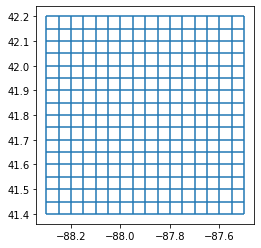

In [19]:
lines.plot()

<AxesSubplot:>

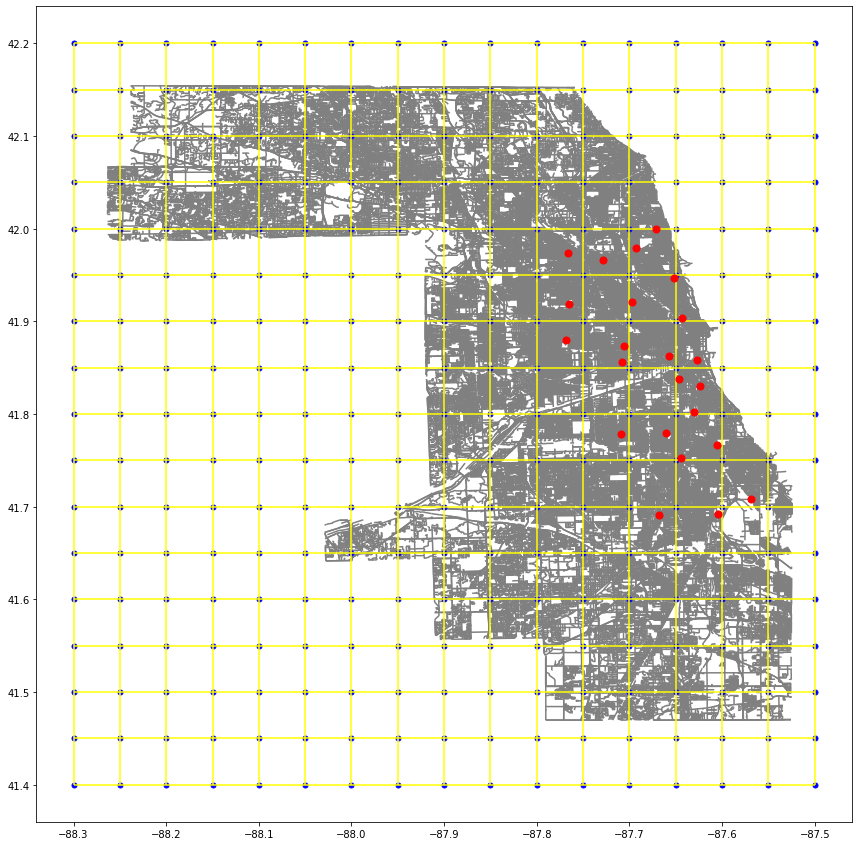

In [20]:
fig, ax = plt.subplots(figsize = (15, 15))

stations.plot(ax = ax, color = "red", markersize = 50, zorder = 10)
data.plot(ax = ax, color = "gray", zorder = 0)
grid.plot(ax = ax, color = "blue", zorder = 5, markersize = 25)
lines.plot(ax = ax, color = "yellow", zorder = 5)

In [21]:
splitx

[-87.5,
 -87.55,
 -87.6,
 -87.65,
 -87.7,
 -87.75,
 -87.8,
 -87.85,
 -87.9,
 -87.95,
 -88.0,
 -88.05,
 -88.1,
 -88.15,
 -88.2,
 -88.25,
 -88.3]

In [22]:
splity

[41.4,
 41.45,
 41.5,
 41.55,
 41.6,
 41.65,
 41.7,
 41.75,
 41.8,
 41.85,
 41.9,
 41.95,
 42.0,
 42.05,
 42.1,
 42.15,
 42.2]

In [23]:
# Break

In [24]:
import gpd_lite_toolbox as glt

In [25]:
populate = []
for x in range(len(stations)):
    populate.append(int(x))
stations["num"] = populate

In [26]:
stat = glt.gridify_data(stations, 8000, col_name = "num", method=np.min) 

AttributeError: module 'gpd_lite_toolbox' has no attribute 'gridify_data'

In [27]:
stat.plot(figsize = (15, 15))

NameError: name 'stat' is not defined

In [28]:
del stations["num"]

<AxesSubplot:>

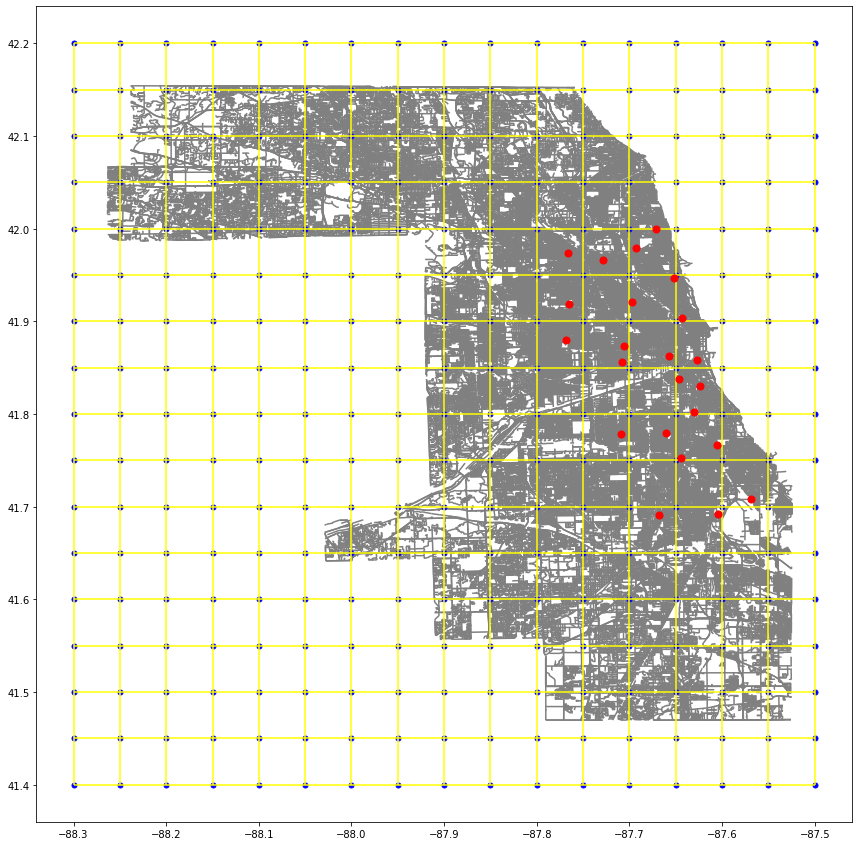

In [29]:
fig, ax = plt.subplots(figsize = (15, 15))

stations.plot(ax = ax, color = "red", markersize = 50, zorder = 10)
data.plot(ax = ax, color = "gray", zorder = 0)
grid.plot(ax = ax, color = "blue", zorder = 5, markersize = 25)
lines.plot(ax = ax, color = "yellow", zorder = 5)

In [30]:
# Seems gridlite didn't work, so we'll have to do it ourself

# Let's make a square, and then we can find the centroid of each and do our distance calculations

# Let's use the coordinates again, we can use the splitx and splity to help us

poly = []

for x in range(0, 16):
    for y in range(0, 16):
        poly.append(Polygon( [(-88.3 +y*.05, 42.2 - x*.05), (-88.3 +y*.05, 42.15 - (x)*.05), (-88.25 +y*.05,42.15 - x*.05), (-88.25 +y*.05, 42.2 - x*.05)]) )


In [31]:
poly

In [32]:
poly = gpd.GeoDataFrame(poly, geometry = poly)

<AxesSubplot:>

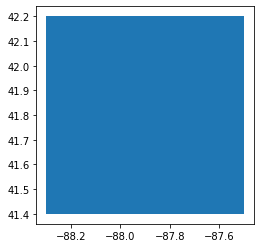

In [33]:
poly.plot()

<AxesSubplot:>

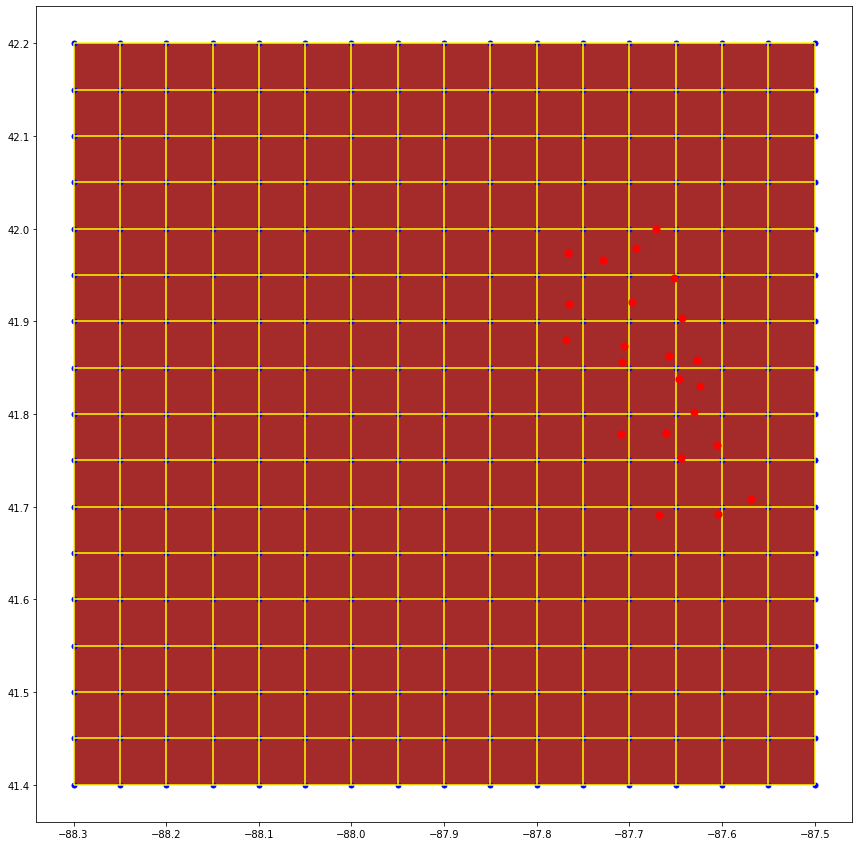

In [34]:
fig, ax = plt.subplots(figsize = (15, 15))

stations.plot(ax = ax, color = "red", markersize = 50, zorder = 10)
data.plot(ax = ax, color = "gray", zorder = 0)
grid.plot(ax = ax, color = "blue", zorder = 5, markersize = 25)
lines.plot(ax = ax, color = "yellow", zorder = 5)
poly.plot(ax = ax , color = "brown", zorder = 1)

In [35]:
# Alright lets just calc the centroid of each of these squares, and run some basic analaysis

poly

0  \
0    POLYGON ((-88.3 42.2, -88.3 42.15, -88.25 42.1...   
1    POLYGON ((-88.25 42.2, -88.25 42.15, -88.2 42....   
2    POLYGON ((-88.2 42.2, -88.2 42.15, -88.1500000...   
3    POLYGON ((-88.14999999999999 42.2, -88.1499999...   
4    POLYGON ((-88.09999999999999 42.2, -88.0999999...   
..                                                 ...   
251  POLYGON ((-87.75 41.45, -87.75 41.4, -87.7 41....   
252  POLYGON ((-87.7 41.45, -87.7 41.4, -87.6500000...   
253  POLYGON ((-87.64999999999999 41.45, -87.649999...   
254  POLYGON ((-87.59999999999999 41.45, -87.599999...   
255  POLYGON ((-87.55 41.45, -87.55 41.4, -87.5 41....   

                                              geometry  
0    POLYGON ((-88.30000 42.20000, -88.30000 42.150...  
1    POLYGON ((-88.25000 42.20000, -88.25000 42.150...  
2    POLYGON ((-88.20000 42.20000, -88.20000 42.150...  
3    POLYGON ((-88.15000 42.20000, -88.15000 42.150...  
4    POLYGON ((-88.10000 42.20000, -88.10000 42.150...  
..                                                 ...  
251  POLYGON ((-87.75000 41.45000, -87.75000 41.400...  
252  POLYGON ((-87.70000 41.45000, -87.70000 41.400...  
253  POLYGON ((-87.65000 41.45000, -87.65000 41.400...  
254  POLYGON ((-87.60000 41.45000, -87.60000 41.400...  
255  POLYGON ((-87.55000 41.45000, -87.55000 41.400...  

[256 rows x 2 columns]

In [36]:
centroids = []

for x in poly[0]:
    centroids.append(x.centroid)

In [37]:
centroids

In [38]:
centroids = gpd.GeoDataFrame(centroids, geometry = centroids)

<AxesSubplot:>

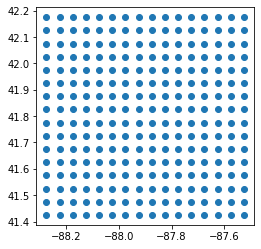

In [39]:
centroids.plot()

<AxesSubplot:>

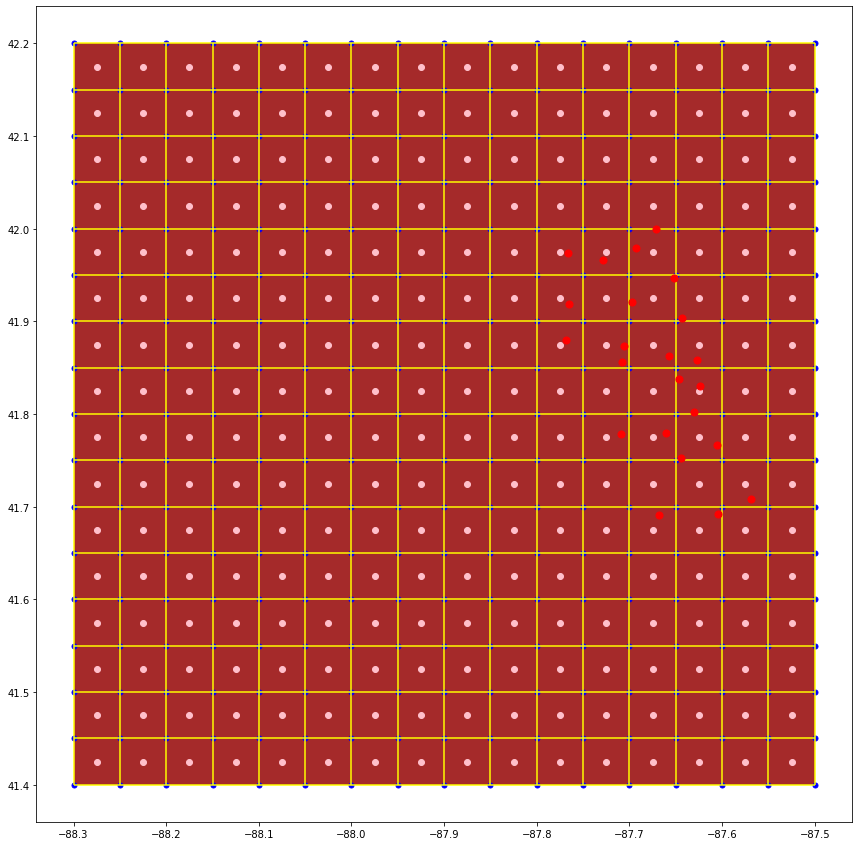

In [40]:
fig, ax = plt.subplots(figsize = (15, 15))

stations.plot(ax = ax, color = "red", markersize = 50, zorder = 10)
data.plot(ax = ax, color = "gray", zorder = 0)
grid.plot(ax = ax, color = "blue", zorder = 5, markersize = 25)
lines.plot(ax = ax, color = "yellow", zorder = 5)
poly.plot(ax = ax , color = "brown", zorder = 1)
centroids.plot(ax = ax, color = "pink", zorder = 2)

In [41]:
stations

DISTRICT   DISTRICT NAME                   ADDRESS     CITY STATE  \
0   Headquarters    Headquarters       3510 S Michigan Ave  Chicago    IL   
1             18      Near North        1160 N Larrabee St  Chicago    IL   
2             19       Town Hall          850 W Addison St  Chicago    IL   
3             20         Lincoln        5400 N Lincoln Ave  Chicago    IL   
4             22     Morgan Park       1900 W Monterey Ave  Chicago    IL   
5             24     Rogers Park           6464 N Clark St  Chicago    IL   
6             25   Grand Central          5555 W Grand Ave  Chicago    IL   
7              1         Central           1718 S State St  Chicago    IL   
8              2       Wentworth      5101 S Wentworth Ave  Chicago    IL   
9              3  Grand Crossing  7040 S Cottage Grove Ave  Chicago    IL   
10             4   South Chicago           2255 E 103rd St  Chicago    IL   
11             5         Calumet            727 E 111th St  Chicago    IL   
12             6         Gresham         7808 S Halsted St  Chicago    IL   
13             7       Englewood            1438 W 63rd St  Chicago    IL   
14             8    Chicago Lawn            3420 W 63rd St  Chicago    IL   
15             9         Deering         3120 S Halsted St  Chicago    IL   
16            10           Ogden          3315 W Ogden Ave  Chicago    IL   
17            11        Harrison        3151 W Harrison St  Chicago    IL   
18            12       Near West  1412 S Blue Island Ave\n  Chicago    IL   
19            14     Shakespeare     2150 N California Ave  Chicago    IL   
20            15          Austin         5701 W Madison St  Chicago    IL   
21            16  Jefferson Park      5151 N Milwaukee Ave  Chicago    IL   
22            17     Albany Park         4650 N Pulaski Rd  Chicago    IL   

      ZIP                                            WEBSITE         PHONE  \
0   60653                      http://home.chicagopolice.org                 
1   60610  http://home.chicagopolice.org/community/distri...  312-742-5870   
2   60613  http://home.chicagopolice.org/community/distri...  312-744-8320   
3   60625  http://home.chicagopolice.org/community/distri...  312-742-8714   
4   60643  http://home.chicagopolice.org/community/distri...  312-745-0710   
5   60626  http://home.chicagopolice.org/community/distri...  312-744-5907   
6   60639  http://home.chicagopolice.org/community/distri...  312-746-8605   
7   60616  http://home.chicagopolice.org/community/distri...  312-745-4290   
8   60609  http://home.chicagopolice.org/community/distri...  312-747-8366   
9   60637  http://home.chicagopolice.org/community/distri...  312-747-8201   
10  60617  http://home.chicagopolice.org/community/distri...  312-747-7581   
11  60628  http://home.chicagopolice.org/community/distri...  312-747-8210   
12  60620  http://home.chicagopolice.org/community/distri...  312-745-3617   
13  60636  http://home.chicagopolice.org/community/distri...  312-747-8223   
14  60629  http://home.chicagopolice.org/community/distri...  312-747-8730   
15  60608  http://home.chicagopolice.org/community/distri...  312-747-8227   
16  60623  http://home.chicagopolice.org/community/distri...  312-747-7511   
17  60612  http://home.chicagopolice.org/community/distri...  312-746-8386   
18  60608  http://home.chicagopolice.org/community/distri...  312-746-8396   
19  60647  http://home.chicagopolice.org/community/distri...  312-744-8250   
20  60644  http://home.chicagopolice.org/community/distri...  312-743-1440   
21  60630  http://home.chicagopolice.org/community/distri...  312-742-4480   
22  60630  http://home.chicagopolice.org/community/distri...  312-742-4410   

             FAX           TTY X COORDINATE Y COORDINATE     LATITUDE  \
0                               1177731.401  1881697.404  41.83070169   
1   312-742-5771  312-742-5773  1172080.029  1908086.527  41.90324165   
2   312-744-4481  312-744-8011  1169730.744  1924160.317  41.947400

In [42]:
# Alright, now that we have the centroids, we can calculate the min distance from the police stations

distance = []

for x in centroids[0]:
    tot = []
    for y in stations["geometry"]:
        tot.append(x.distance(y))
    distance.append(min(tot))

In [43]:
distance

[0.5470763594363698,
 0.5009066051213081,
 0.4555461678624285,
 0.4112629269143357,
 0.3684454899359577,
 0.32766898396727917,
 0.28979621642482445,
 0.25611858787316694,
 0.22849861061753962,
 0.20934779448120444,
 0.2011004302684259,
 0.18327280154380043,
 0.17527506606963228,
 0.1812561110299846,
 0.19996551399107215,
 0.2282950629902382,
 0.5307560532430613,
 0.4830288521963811,
 0.43581160614896797,
 0.3892899177401663,
 0.3437463076952932,
 0.29962711501823114,
 0.2576650772886053,
 0.21910311739942084,
 0.18606735354205814,
 0.1619751340612005,
 0.1511649035131676,
 0.13625442299504387,
 0.12529044969874217,
 0.13352949406671613,
 0.15799542647087209,
 0.19260058095892627,
 0.5187595136998963,
 0.46981519457564896,
 0.4211189868126878,
 0.37276813846431,
 0.3249168648349124,
 0.27782342063647164,
 0.23194985892245007,
 0.18819038512672726,
 0.14842676663643523,
 0.11681347976216368,
 0.10129300594881574,
 0.09242086228613827,
 0.07532625561989684,
 0.08835425165612676,
 0.122224

In [44]:
distance = distance * 111

In [45]:
for x in range(len(distance)):
    distance[x] = round(distance[x] * 111, 2)

In [46]:
distance

[60.73,
 55.6,
 50.57,
 45.65,
 40.9,
 36.37,
 32.17,
 28.43,
 25.36,
 23.24,
 22.32,
 20.34,
 19.46,
 20.12,
 22.2,
 25.34,
 58.91,
 53.62,
 48.38,
 43.21,
 38.16,
 33.26,
 28.6,
 24.32,
 20.65,
 17.98,
 16.78,
 15.12,
 13.91,
 14.82,
 17.54,
 21.38,
 57.58,
 52.15,
 46.74,
 41.38,
 36.07,
 30.84,
 25.75,
 20.89,
 16.48,
 12.97,
 11.24,
 10.26,
 8.36,
 9.81,
 13.57,
 18.26,
 56.76,
 51.24,
 45.73,
 40.23,
 34.75,
 29.28,
 23.86,
 18.52,
 13.34,
 8.64,
 5.74,
 6.18,
 2.83,
 5.86,
 11.05,
 16.47,
 56.48,
 50.93,
 45.38,
 39.83,
 34.28,
 28.73,
 23.18,
 17.63,
 12.08,
 6.53,
 0.99,
 1.05,
 2.04,
 4.25,
 9.03,
 14.37,
 56.48,
 50.95,
 45.43,
 39.9,
 34.35,
 28.8,
 23.26,
 17.71,
 12.17,
 6.63,
 1.26,
 3.09,
 2.53,
 3.16,
 7.96,
 13.36,
 56.26,
 50.71,
 45.16,
 39.61,
 34.06,
 28.51,
 22.96,
 17.41,
 11.87,
 6.33,
 0.94,
 2.17,
 2.41,
 1.86,
 6.1,
 11.51,
 56.59,
 51.07,
 45.57,
 40.07,
 34.6,
 29.15,
 23.76,
 18.45,
 13.34,
 8.78,
 6.16,
 3.97,
 3.46,
 0.66,
 5.41,
 10.94,
 57.45,
 52.03,

In [47]:
print("The average distance from a police station in chicago is: " + str(round(sum(distance)/len(distance), 2)) + " kilometers")

The average distance from a police station in chicago is: 28.41 kilometers


In [48]:
# Now this is just with allll the squares, we have to shorten it a bit

keepers = []
for x in poly["geometry"]:
    value = False
    for y in data["geometry"]:
        if y.intersects(x):
            value = True
    if(value):
        keepers.append(x)

    
    

In [49]:
keepers

In [50]:
keepers = gpd.GeoDataFrame(keepers, geometry = keepers)

<AxesSubplot:>

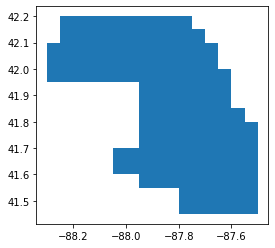

In [51]:
keepers.plot()

<AxesSubplot:>

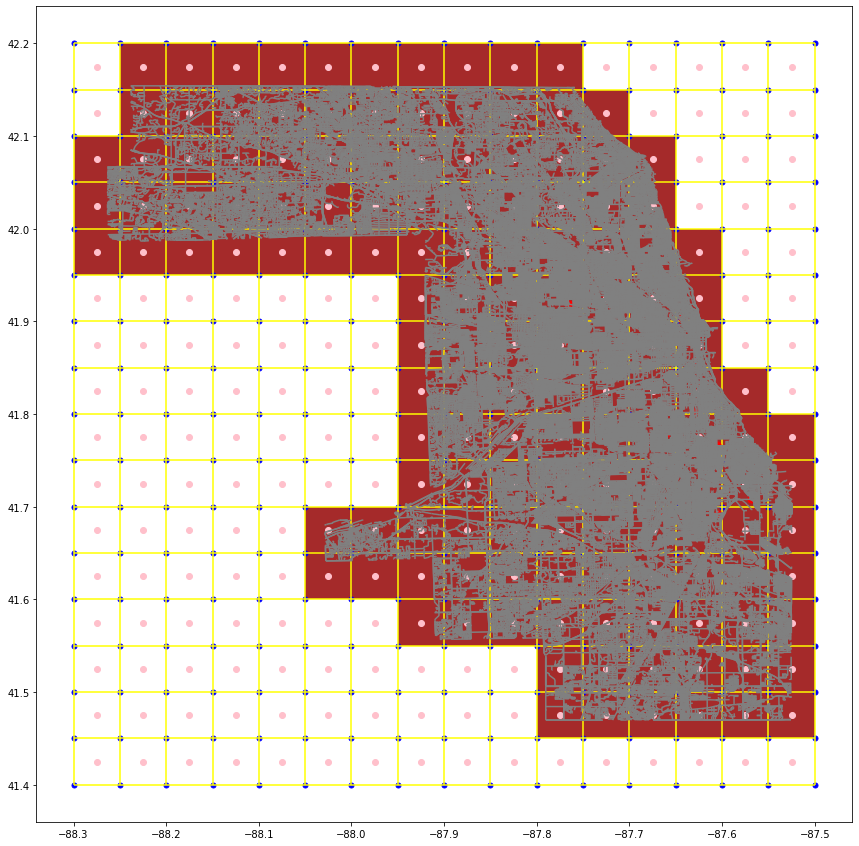

In [52]:
fig, ax = plt.subplots(figsize = (15, 15))

stations.plot(ax = ax, color = "red", markersize = 50, zorder = 10)
data.plot(ax = ax, color = "gray", zorder = 15)
grid.plot(ax = ax, color = "blue", zorder = 5, markersize = 25)
lines.plot(ax = ax, color = "yellow", zorder = 5)
#poly.plot(ax = ax , color = "brown", zorder = 1)
keepers.plot(ax = ax, color = "brown", zorder = 1)
centroids.plot(ax = ax, color = "pink", zorder = 2)

In [53]:
keepers

0  \
0    POLYGON ((-88.25 42.2, -88.25 42.15, -88.2 42....   
1    POLYGON ((-88.2 42.2, -88.2 42.15, -88.1500000...   
2    POLYGON ((-88.14999999999999 42.2, -88.1499999...   
3    POLYGON ((-88.09999999999999 42.2, -88.0999999...   
4    POLYGON ((-88.05 42.2, -88.05 42.15, -88 42.15...   
..                                                 ...   
139  POLYGON ((-87.75 41.5, -87.75 41.45, -87.7 41....   
140  POLYGON ((-87.7 41.5, -87.7 41.45, -87.6500000...   
141  POLYGON ((-87.64999999999999 41.5, -87.6499999...   
142  POLYGON ((-87.59999999999999 41.5, -87.5999999...   
143  POLYGON ((-87.55 41.5, -87.55 41.45, -87.5 41....   

                                              geometry  
0    POLYGON ((-88.25000 42.20000, -88.25000 42.150...  
1    POLYGON ((-88.20000 42.20000, -88.20000 42.150...  
2    POLYGON ((-88.15000 42.20000, -88.15000 42.150...  
3    POLYGON ((-88.10000 42.20000, -88.10000 42.150...  
4    POLYGON ((-88.05000 42.20000, -88.05000 42.150...  
..                                                 ...  
139  POLYGON ((-87.75000 41.50000, -87.75000 41.450...  
140  POLYGON ((-87.70000 41.50000, -87.70000 41.450...  
141  POLYGON ((-87.65000 41.50000, -87.65000 41.450...  
142  POLYGON ((-87.60000 41.50000, -87.60000 41.450...  
143  POLYGON ((-87.55000 41.50000, -87.55000 41.450...  

[144 rows x 2 columns]

In [54]:
# Now that we have the right polygons, we can repeat some previous steps and get the stuff we need

new_centroid = []

for x in keepers[0]:
    new_centroid.append(x.centroid)

In [55]:
new_centroid

In [56]:
distance2 = []

for x in new_centroid:
    tot = []
    for y in stations["geometry"]:
        tot.append(x.distance(y))
    distance2.append(min(tot))

In [57]:
distance2

[0.5009066051213081,
 0.4555461678624285,
 0.4112629269143357,
 0.3684454899359577,
 0.32766898396727917,
 0.28979621642482445,
 0.25611858787316694,
 0.22849861061753962,
 0.20934779448120444,
 0.2011004302684259,
 0.4830288521963811,
 0.43581160614896797,
 0.3892899177401663,
 0.3437463076952932,
 0.29962711501823114,
 0.2576650772886053,
 0.21910311739942084,
 0.18606735354205814,
 0.1619751340612005,
 0.1511649035131676,
 0.13625442299504387,
 0.5187595136998963,
 0.46981519457564896,
 0.4211189868126878,
 0.37276813846431,
 0.3249168648349124,
 0.27782342063647164,
 0.23194985892245007,
 0.18819038512672726,
 0.14842676663643523,
 0.11681347976216368,
 0.10129300594881574,
 0.09242086228613827,
 0.07532625561989684,
 0.5113911204295148,
 0.46166628862648895,
 0.41200806552074487,
 0.3624438302056592,
 0.313018232782294,
 0.2638092076750763,
 0.21496553689869963,
 0.16680847117022454,
 0.12016634326694184,
 0.07781281420272063,
 0.05166931443466732,
 0.055675152252872034,
 0.025502

In [58]:
for x in range(len(distance2)):
    distance2[x] = distance2[x] * 111

In [59]:
distance2

[55.6006331684652,
 50.565624632729566,
 45.650184887491264,
 40.89744938289131,
 36.37125722036799,
 32.167380023155516,
 28.42916325392153,
 25.363345778546897,
 23.237605187413692,
 22.322147759795275,
 53.6162025937983,
 48.375088282535444,
 43.21118086915846,
 38.15584015417755,
 33.25860976702366,
 28.60082357903519,
 24.320446031335713,
 20.653476243168452,
 17.979239880793255,
 16.779304289961605,
 15.124240952449869,
 57.582306020688485,
 52.14948659789704,
 46.74420753620834,
 41.37726336953841,
 36.065771996675274,
 30.83839969064835,
 25.746434340391957,
 20.889132749066725,
 16.47537109664431,
 12.966296253600168,
 11.243523660318548,
 10.258715713761347,
 8.361214373808549,
 56.764414367676146,
 51.24495803754027,
 45.73289527280268,
 40.23126515282817,
 34.74502383883463,
 29.282822051933472,
 23.86117459575566,
 18.515740299894926,
 13.338464102630544,
 8.63722237650199,
 5.735293902248072,
 6.179941900068796,
 2.8308107518505015,
 56.4825681989606,
 50.93257794490928,


In [60]:
print("The average distance from a police station in Chicago is " + str(round(sum(distance2)/len(distance2), 2)) + " kilometers.")

The average distance from a police station in Chicago is 19.8 kilometers.


In [61]:
new_centroid = gpd.GeoDataFrame(new_centroid, geometry = new_centroid)

<AxesSubplot:>

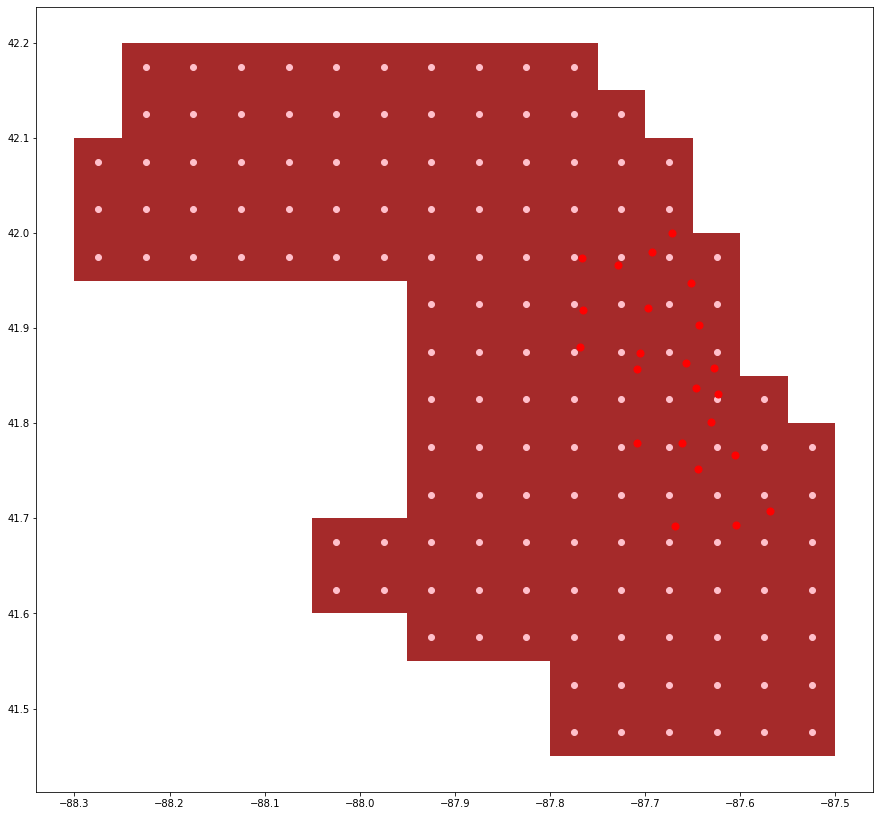

In [62]:
fig, ax = plt.subplots(figsize = (15, 15))

stations.plot(ax = ax, color = "red", markersize = 50, zorder = 10)
#data.plot(ax = ax, color = "gray", zorder = 15)
#grid.plot(ax = ax, color = "blue", zorder = 5, markersize = 25)
#lines.plot(ax = ax, color = "yellow", zorder = 5)
#poly.plot(ax = ax , color = "brown", zorder = 1)
keepers.plot(ax = ax, color = "brown", zorder = 1)
new_centroid.plot(ax = ax, color = "pink", zorder = 2)

In [63]:
# Let's take a look at the crimes??

crime = pd.read_csv("/Users/gaurishlakhanpal/Downloads/crimes.csv")

In [64]:
crimes = crime.copy()

In [65]:
crimes.dropna(inplace = True)

In [66]:
crimes.head()

ID Case Number                    Date                Block  IUCR  \
0  10224738    HY411648  09/05/2015 01:30:00 PM      043XX S WOOD ST  0486   
1  10224739    HY411615  09/04/2015 11:30:00 AM  008XX N CENTRAL AVE  0870   
3  10224740    HY411595  09/05/2015 12:45:00 PM    035XX W BARRY AVE  2023   
4  10224741    HY411610  09/05/2015 01:00:00 PM  0000X N LARAMIE AVE  0560   
5  10224742    HY411435  09/05/2015 10:55:00 AM  082XX S LOOMIS BLVD  0610   

  Primary Type              Description Location Description  Arrest  \
0      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
1        THEFT           POCKET-PICKING              CTA BUS   False   
3    NARCOTICS    POSS: HEROIN(BRN/TAN)             SIDEWALK    True   
4      ASSAULT                   SIMPLE            APARTMENT   False   
5     BURGLARY           FORCIBLE ENTRY            RESIDENCE   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
0      True  ...  12.0            61.0       08B     1165074.0    1875917.0   
1     False  ...  29.0            25.0        06     1138875.0    1904869.0   
3     False  ...  35.0            21.0        18     1152037.0    1920384.0   
4      True  ...  28.0            25.0       08A     1141706.0    1900086.0   
5     False  ...  21.0            71.0        05     1168430.0    1850165.0   

   Year              Updated On   Latitude  Longitude  \
0  2015  02/10/2018 03:50:01 PM  41.815117 -87.670000   
1  2015  02/10/2018 03:50:01 PM  41.895080 -87.765400   
3  2015  02/10/2018 03:50:01 PM  41.937406 -87.716650   
4  2015  02/10/2018 03:50:01 PM  41.881903 -87.755121   
5  2015  02/10/2018 03:50:01 PM  41.744379 -87.658431   

                        Location  
0  (41.815117282, -87.669999562)  
1  (41.895080471, -87.765400451)  
3  (41.937405765, -87.716649687)  
4  (41.881903443, -87.755121152)  
5  (41.744378879, -87.658430635)  

[5 rows x 22 columns]

In [67]:
len(crimes)

6612778

In [68]:
crimes["Primary Type"].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'ARSON', 'STALKING', 'KIDNAPPING',
       'INTIMIDATION', 'HOMICIDE', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'HUMAN TRAFFICKING', 'OBSCENITY',
       'CRIMINAL SEXUAL ASSAULT', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM'], dtype=object)

In [69]:
crimes = crimes.loc[crimes['Primary Type'] == "PROSTITUTION"]

In [70]:
crimes.reset_index(drop=True, inplace = True)

In [71]:
crimes

ID Case Number                    Date                  Block  \
0      10225096    HY412036  09/05/2015 08:45:00 PM        026XX W 47TH ST   
1      10227985    HY415132  09/08/2015 11:42:00 AM     015XX N PULASKI RD   
2      10228124    HY412238  09/06/2015 12:02:00 AM        027XX W 47TH ST   
3      10228329    HY416029  09/08/2015 06:08:00 PM    092XX S ASHLAND AVE   
4      10229555    HY416711  09/09/2015 02:25:00 PM  047XX W ARTHINGTON ST   
...         ...         ...                     ...                    ...   
60894  12312248    JE165322  03/10/2021 07:46:00 PM        049XX W 48TH ST   
60895  12312317    JE165316  03/10/2021 07:12:00 PM     050XX S CICERO AVE   
60896  12313154    JE166363  03/11/2021 08:53:00 PM     049XX S CICERO AVE   
60897  12313163    JE166366  03/11/2021 07:41:00 PM        048XX W 51ST ST   
60898  12316777    JE170884  03/16/2021 06:18:00 PM        051XX W 50TH ST   

       IUCR  Primary Type            Description Location Description  Arrest  \
0      1506  PROSTITUTION  SOLICIT ON PUBLIC WAY               STREET    True   
1      1506  PROSTITUTION  SOLICIT ON PUBLIC WAY             SIDEWALK    True   
2      1506  PROSTITUTION  SOLICIT ON PUBLIC WAY               STREET    True   
3      1505  PROSTITUTION         CALL OPERATION             SIDEWALK    True   
4      1506  PROSTITUTION  SOLICIT ON PUBLIC WAY               STREET    True   
...     ...           ...                    ...                  ...     ...   
60894  1506  PROSTITUTION  SOLICIT ON PUBLIC WAY               STREET    True   
60895  1506  PROSTITUTION  SOLICIT ON PUBLIC WAY               STREET    True   
60896  1506  PROSTITUTION  SOLICIT ON PUBLIC WAY               STREET    True   
60897  1506  PROSTITUTION  SOLICIT ON PUBLIC WAY             SIDEWALK    True   
60898  1506  PROSTITUTION  SOLICIT ON PUBLIC WAY             SIDEWALK    True   

       Domestic  ...  Ward  Community Area  FBI Code  X Coordinate  \
0         False  ...  12.0            58.0        16     1159360.0   
1         False  ...  30.0            23.0        16     1149436.0   
2         False  ...  12.0            58.0        16     1159077.0   
3         False  ...  21.0            73.0        16     1167290.0   
4         False  ...  24.0            25.0        16     1145026.0   
...         ...  ...   ...             ...       ...           ...   
60894     False  ...  22.0            56.0        16     1144354.0   
60895     False  ...  22.0            56.0        16     1145210.0   
60896     False  ...  22.0            56.0        16     1145196.0   
60897     False  ...  22.0            56.0        16     1145139.0   
60898     False  ...  22.0            56.0        16     1143121.0   

      Y Coordinate  Year              Updated On   Latitude  Longitude  \
0        1873402.0  2015  02/10/2018 03:50:01 PM  41.808335 -87.691028   
1        1909960.0  2015  02/10/2018 03:50:01 PM  41.908852 -87.726480   
2        1873393.0  2015  02/10/2018 03:50:01 PM  41.808316 -87.692067   
3        1843536.0  2015  02/10/2018 03:50:01 PM  41.726212 -87.662797   
4        1895614.0  2015  02/10/2018 03:50:01 PM  41.869570 -87.743043   
...            ...   ...                     ...        ...        ...   
60894    1872357.0  2021  03/17/2021 04:51:25 PM  41.805762 -87.746094   
60895    1870880.0  2021  03/17/2021 04:51:25 PM  41.801693 -87.742992   
60896    1871375.0  2021  03/18/2021 04:52:21 PM  41.803051 -87.743030   
60897    1870381.0  2021  03/18/2021 04:52:21 PM  41.800325 -87.743264   
60898    1870993.0  2021  03/23/2021 05:03:34 PM  41.802042 -87.750650   

                            Location  
0      (41.808334931, -87.691028429)  
1      (41.908852307, -87.726479986)  
2      (41.808316033, -87.692066658)  
3      (41.726212389, -87.662796973)  
4      (41.869569701, -87.743042954)  
...                              ...  
60894  (41.805761854, -87.746093829)  
60895  (41.801692642, -87.742991505)  
60896  (41.803051264, 

In [72]:
crime_points = []

for x in range(len(crimes)):
    crime_points.append(Point(crimes["Longitude"][x], crimes["Latitude"][x]))

In [73]:
crime_points

 ...]

In [74]:
crime_points = gpd.GeoDataFrame(crime_points, geometry = crime_points)

In [75]:
crime_points.head()

0                    geometry
0       POINT (-87.691028429 41.808334931)  POINT (-87.69103 41.80833)
1       POINT (-87.726479986 41.908852307)  POINT (-87.72648 41.90885)
2  POINT (-87.69206665799999 41.808316033)  POINT (-87.69207 41.80832)
3       POINT (-87.662796973 41.726212389)  POINT (-87.66280 41.72621)
4  POINT (-87.74304295399999 41.869569701)  POINT (-87.74304 41.86957)

In [76]:
crime_points[0][0].x

-87.691028429

<AxesSubplot:>

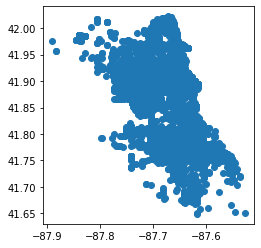

In [77]:
crime_points.plot()

In [78]:
new = []
for x in range(len(crime_points)):
    if(crime_points[0][x].x > -89):
        new.append(crime_points[0][x])
crime_points = gpd.GeoDataFrame(new, geometry = new)

In [79]:
crime_points.head()

0                    geometry
0       POINT (-87.691028429 41.808334931)  POINT (-87.69103 41.80833)
1       POINT (-87.726479986 41.908852307)  POINT (-87.72648 41.90885)
2  POINT (-87.69206665799999 41.808316033)  POINT (-87.69207 41.80832)
3       POINT (-87.662796973 41.726212389)  POINT (-87.66280 41.72621)
4  POINT (-87.74304295399999 41.869569701)  POINT (-87.74304 41.86957)

In [80]:
crime_points

0                    geometry
0           POINT (-87.691028429 41.808334931)  POINT (-87.69103 41.80833)
1           POINT (-87.726479986 41.908852307)  POINT (-87.72648 41.90885)
2      POINT (-87.69206665799999 41.808316033)  POINT (-87.69207 41.80832)
3           POINT (-87.662796973 41.726212389)  POINT (-87.66280 41.72621)
4      POINT (-87.74304295399999 41.869569701)  POINT (-87.74304 41.86957)
...                                        ...                         ...
60894       POINT (-87.746093829 41.805761854)  POINT (-87.74609 41.80576)
60895  POINT (-87.74299150500001 41.801692642)  POINT (-87.74299 41.80169)
60896       POINT (-87.743030382 41.803051264)  POINT (-87.74303 41.80305)
60897  POINT (-87.74326445700001 41.800324645)  POINT (-87.74326 41.80032)
60898  POINT (-87.75064999200001 41.802041848)  POINT (-87.75065 41.80204)

[60899 rows x 2 columns]

<AxesSubplot:>

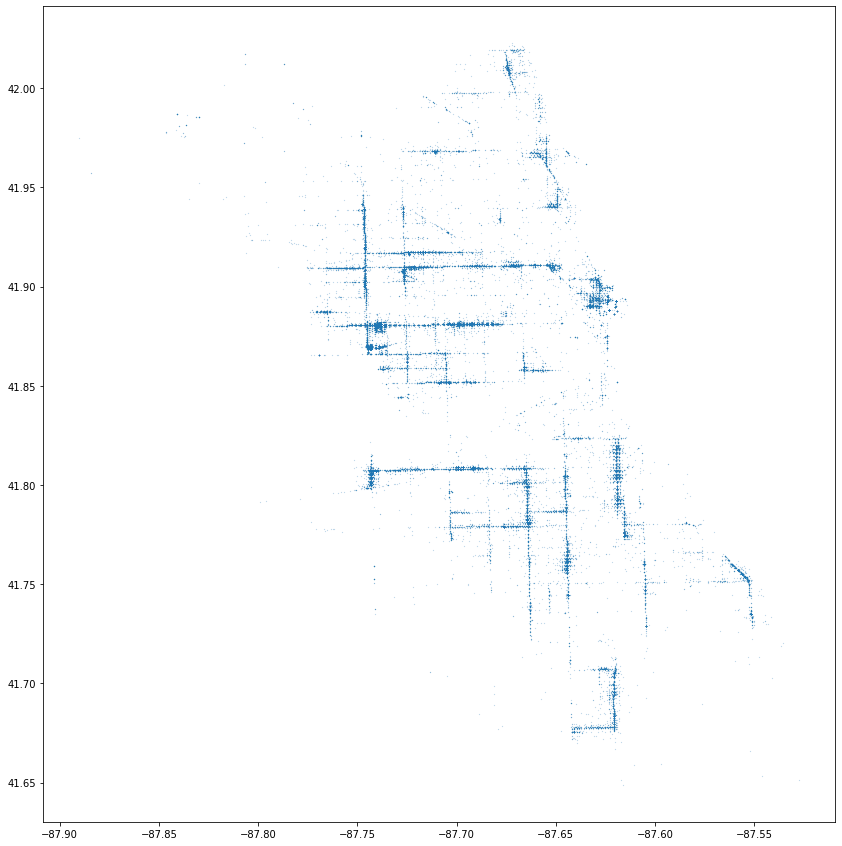

In [81]:
crime_points.plot(figsize = (15, 15), markersize = .01)

In [82]:
crime_points.head()

0                    geometry
0       POINT (-87.691028429 41.808334931)  POINT (-87.69103 41.80833)
1       POINT (-87.726479986 41.908852307)  POINT (-87.72648 41.90885)
2  POINT (-87.69206665799999 41.808316033)  POINT (-87.69207 41.80832)
3       POINT (-87.662796973 41.726212389)  POINT (-87.66280 41.72621)
4  POINT (-87.74304295399999 41.869569701)  POINT (-87.74304 41.86957)

In [83]:
keepers2 = []
for x in poly["geometry"]:
    value = False
    for y in crime_points["geometry"]:
        if y.intersects(x):
            value = True
    if(value):
        keepers2.append(x)

In [84]:
keepers2

In [85]:
keepers2 = gpd.GeoDataFrame(keepers2, geometry = keepers2)

<AxesSubplot:>

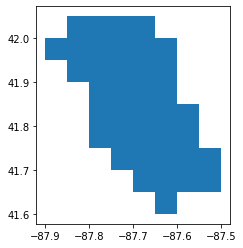

In [86]:
keepers2.plot()

<AxesSubplot:>

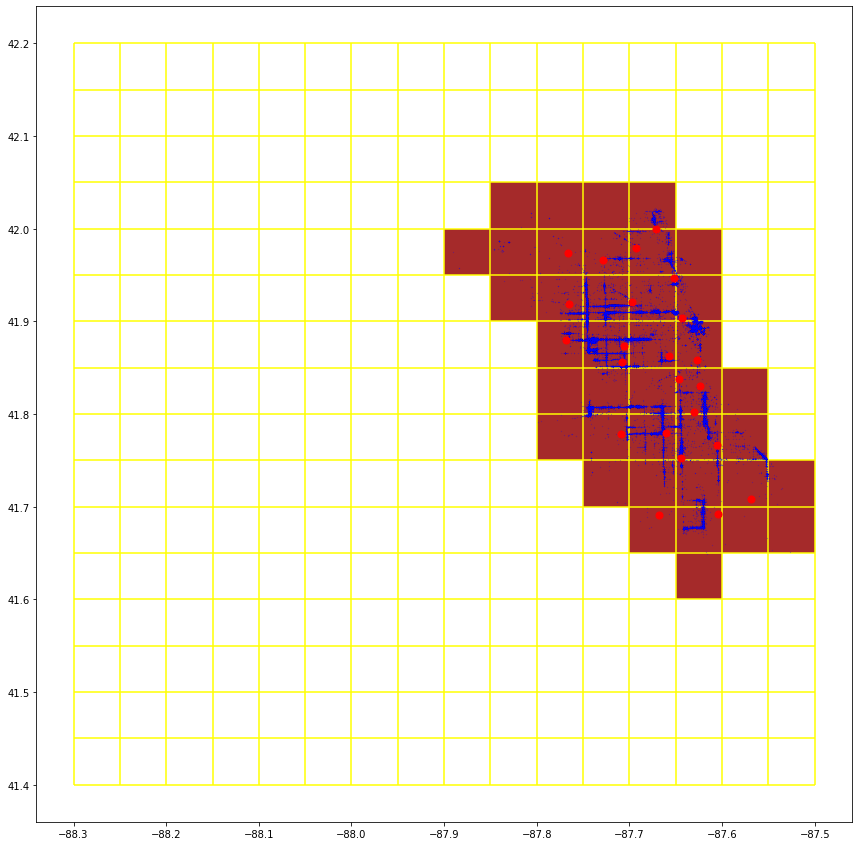

In [87]:
fig, ax = plt.subplots(figsize = (15, 15))

stations.plot(ax = ax, color = "red", markersize = 50, zorder = 10)
#data.plot(ax = ax, color = "gray", zorder = 15)
#grid.plot(ax = ax, color = "blue", zorder = 5, markersize = 25)
lines.plot(ax = ax, color = "yellow", zorder = 5)
#poly.plot(ax = ax , color = "brown", zorder = 1)
#keepers.plot(ax = ax, color = "brown", zorder = 1)
#new_centroid.plot(ax = ax, color = "pink", zorder = 2)
crime_points.plot(ax = ax, color = "blue", zorder = 5, markersize = .01)
keepers2.plot(ax = ax, color = "brown", zorder = 1)

In [88]:
# Let's make the array of centroids and calc the distances first 

crime_centroid = []
for x in range(len(keepers2)):
    crime_centroid.append(keepers2[0][x].centroid)

In [89]:
crime_centroid

In [90]:
crime_centroid = gpd.GeoDataFrame(crime_centroid, geometry = crime_centroid)

In [91]:
crime_centroid.head()

0                    geometry
0  POINT (-87.82499999999999 42.02500000000001)  POINT (-87.82500 42.02500)
1  POINT (-87.77500000000001 42.02500000000001)  POINT (-87.77500 42.02500)
2  POINT (-87.72499999999999 42.02500000000001)  POINT (-87.72500 42.02500)
3             POINT (-87.675 42.02500000000001)  POINT (-87.67500 42.02500)
4             POINT (-87.875 41.97499999999999)  POINT (-87.87500 41.97500)

In [92]:
# Lets find the distances yey

crime_distance = []

for x in crime_centroid[0]:
    tot = []
    for y in stations["geometry"]:
        tot.append(x.distance(y))
    crime_distance.append(min(tot))

In [93]:
crime_distance

[0.07781281420272063,
 0.05166931443466732,
 0.055675152252872034,
 0.025502799566220733,
 0.10885492664160025,
 0.058858126491987434,
 0.008897362201697338,
 0.009473213693877746,
 0.018415335413191743,
 0.038270377744304473,
 0.0597682082239491,
 0.01138800747728019,
 0.027822407090950775,
 0.022787460067651265,
 0.0284644837877349,
 0.00849017441421088,
 0.019563306789511105,
 0.021669150013887282,
 0.016793519594680912,
 0.05550161314398303,
 0.035778047665612545,
 0.03116313434923896,
 0.005923189215164354,
 0.04873006433894708,
 0.06625625999925239,
 0.016621491782871884,
 0.01485353046422489,
 0.021073076205720742,
 0.031919594934324134,
 0.056347076136113936,
 0.034184928541683486,
 0.0332589696920057,
 0.018316844569915423,
 0.04658775370200296,
 0.017665993869603623,
 0.02709477540314838,
 0.033598151660459846,
 0.054440314060439726,
 0.07075636264073305]

In [94]:
# Maybe it would have been a good idea to put everything in 1 dataframe 

In [95]:
# Now we need an array that has the density of the crimes for the polygon

# We can use .within

total_count = []

for x in keepers2[0]:
    counter = 0
    for y in crime_points[0]:
        if(y.within(x)):
            counter += 1
    total_count.append(counter)

In [96]:
total_count

[6,
 5,
 3,
 915,
 3,
 58,
 44,
 739,
 1193,
 82,
 15,
 690,
 8253,
 3361,
 1132,
 823,
 12408,
 4680,
 3193,
 5,
 3461,
 3109,
 2861,
 4,
 24,
 768,
 3108,
 4770,
 1294,
 13,
 344,
 1364,
 366,
 21,
 8,
 1770,
 3,
 2,
 1]

In [97]:
for x in range(len(crime_distance)):
    crime_distance[x] = crime_distance[x] * 111

Text(0.5, 1.0, 'Distance from Police Station vs Prositution Caught')

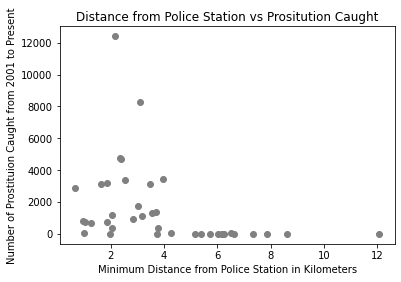

In [98]:
plt.scatter(crime_distance, total_count, color = "grey")
plt.xlabel("Minimum Distance from Police Station in Kilometers")
plt.ylabel("Number of Prostituion Caught from 2001 to Present")
plt.title("Distance from Police Station vs Prositution Caught")

In [99]:
# Let's test with other types of burglaries

BATTERY


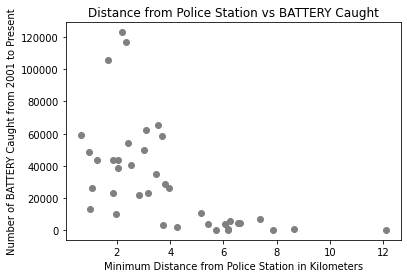

THEFT


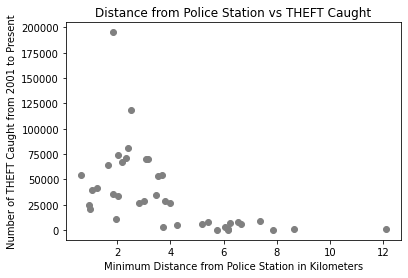

NARCOTICS


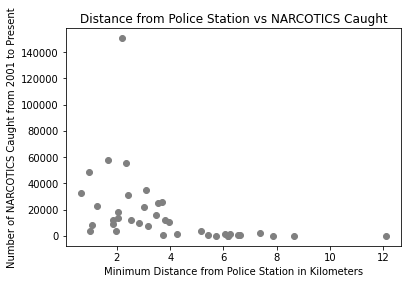

ASSAULT


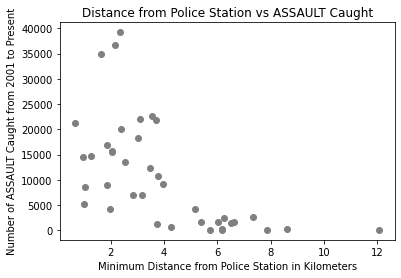

BURGLARY


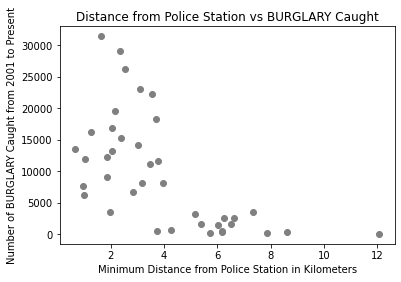

ROBBERY


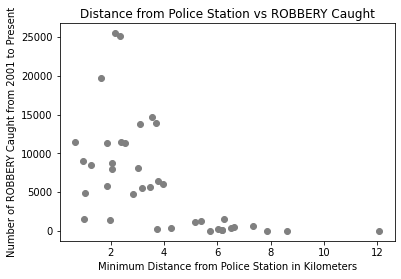

DECEPTIVE PRACTICE


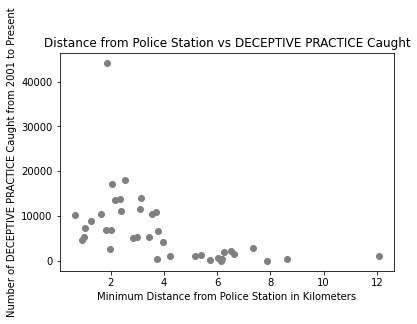

OTHER OFFENSE


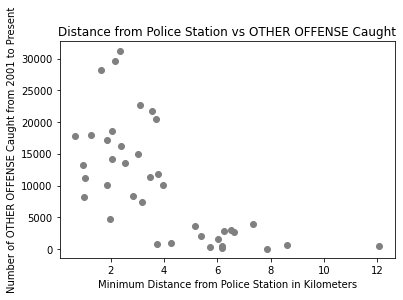

CRIMINAL DAMAGE


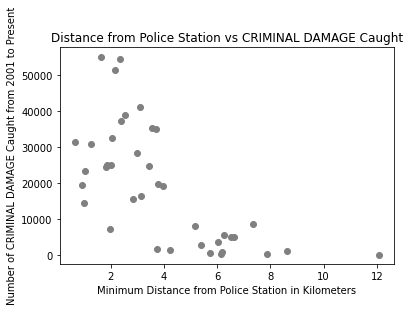

WEAPONS VIOLATION


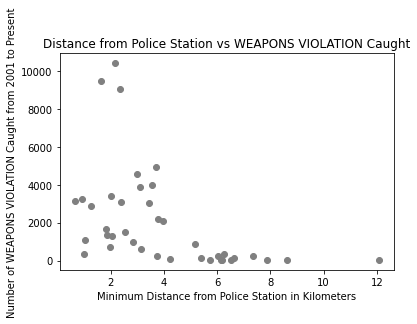

CRIMINAL TRESPASS


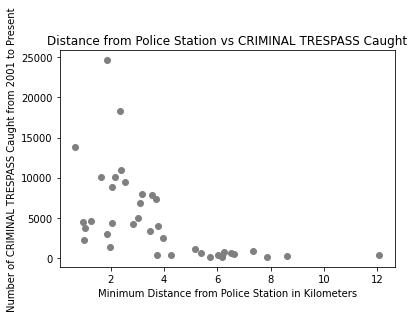

MOTOR VEHICLE THEFT


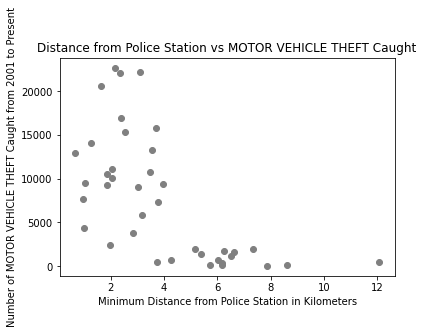

SEX OFFENSE


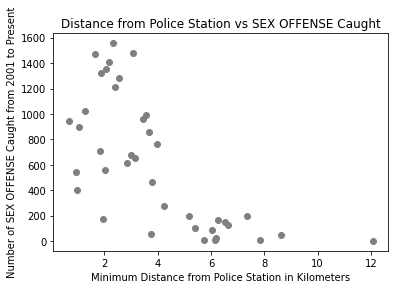

INTERFERENCE WITH PUBLIC OFFICER


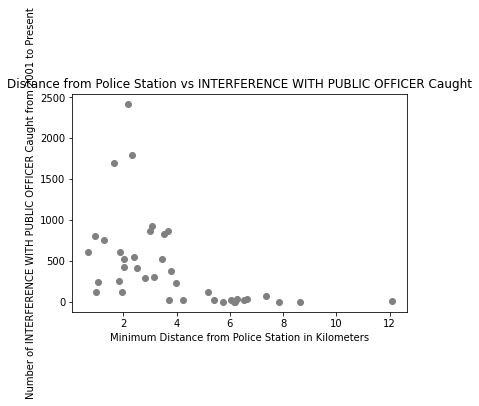

OFFENSE INVOLVING CHILDREN


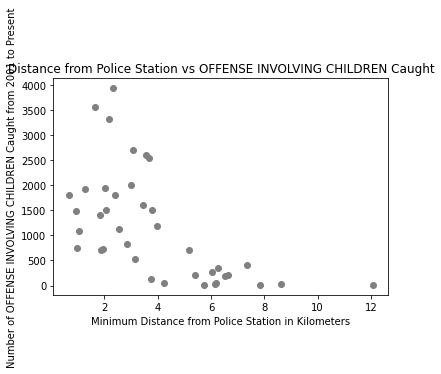

PUBLIC PEACE VIOLATION


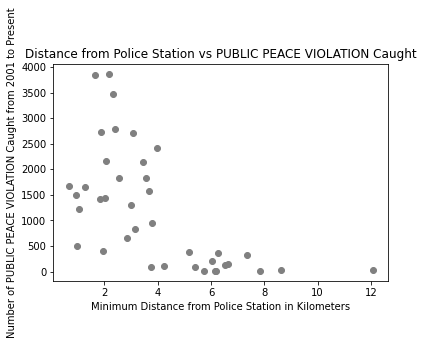

PROSTITUTION


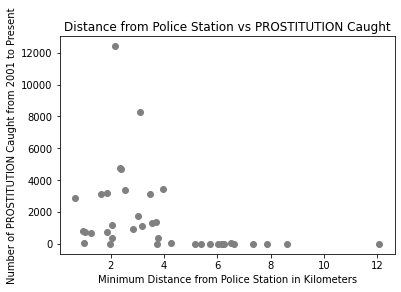

GAMBLING


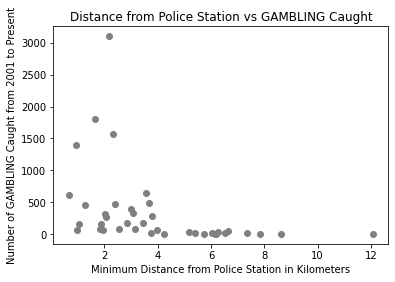

CRIM SEXUAL ASSAULT


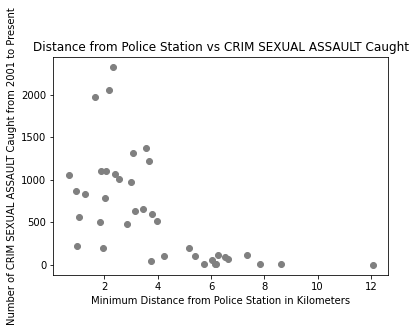

LIQUOR LAW VIOLATION


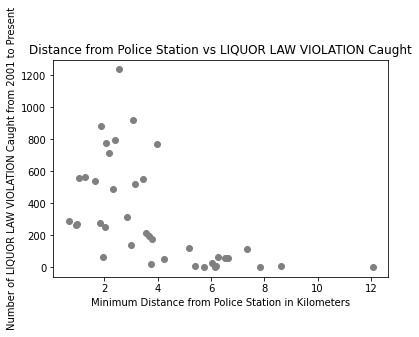

CRIMINAL SEXUAL ASSAULT


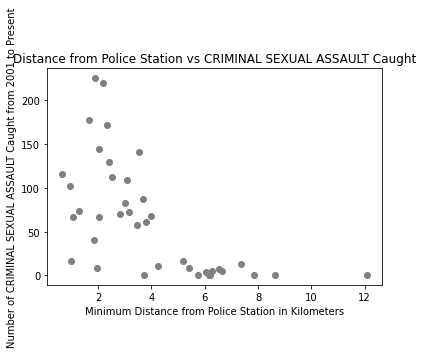

ARSON


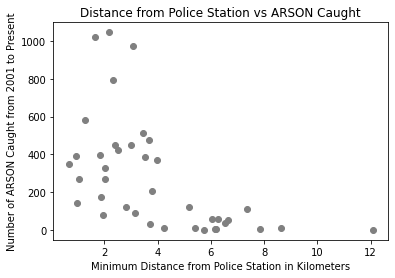

STALKING


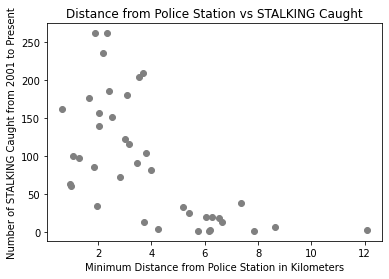

KIDNAPPING


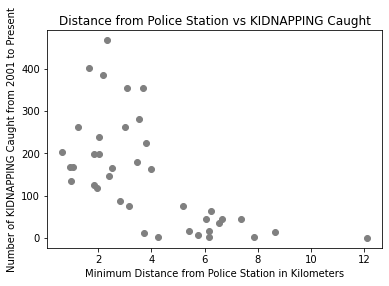

INTIMIDATION


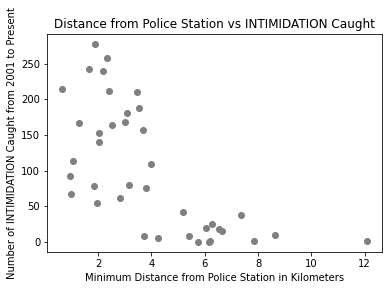

HOMICIDE


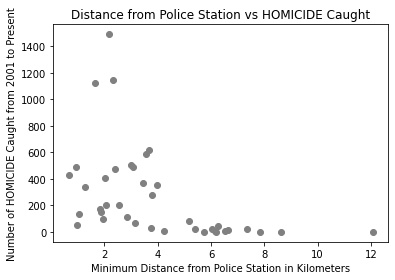

CONCEALED CARRY LICENSE VIOLATION


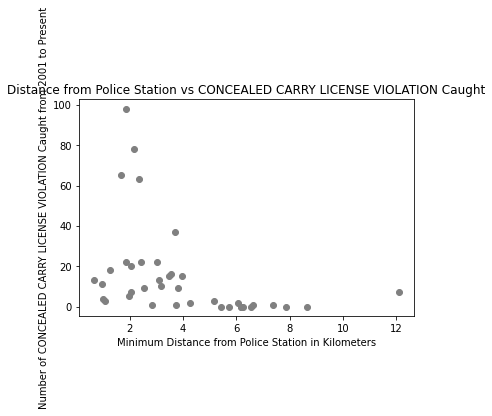

NON - CRIMINAL


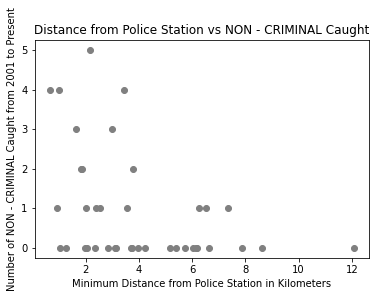

HUMAN TRAFFICKING


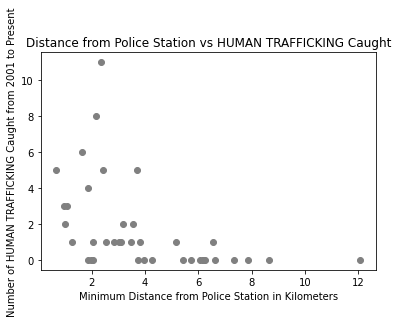

OBSCENITY


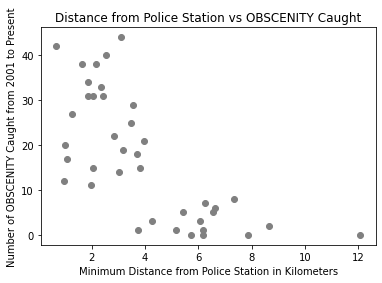

PUBLIC INDECENCY


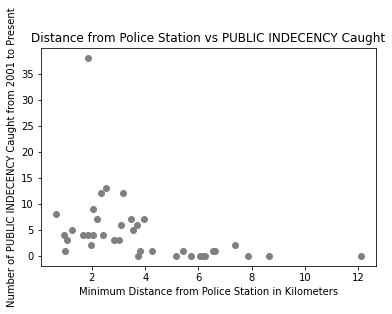

OTHER NARCOTIC VIOLATION


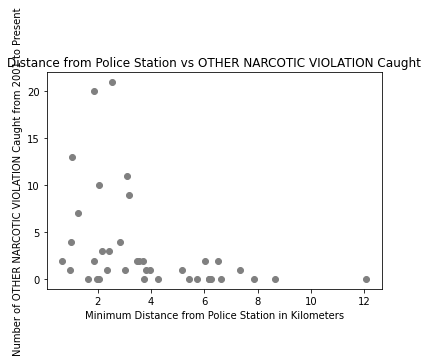

NON-CRIMINAL


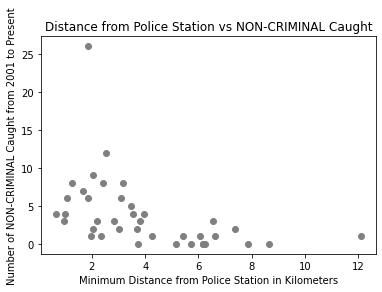

NON-CRIMINAL (SUBJECT SPECIFIED)


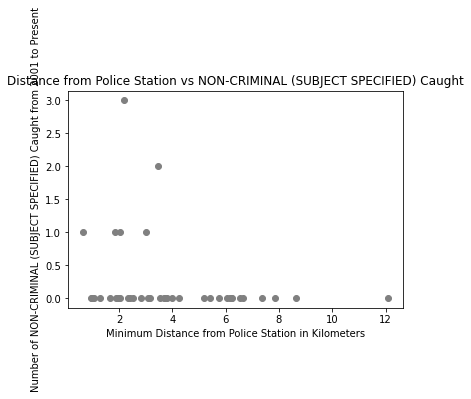

RITUALISM


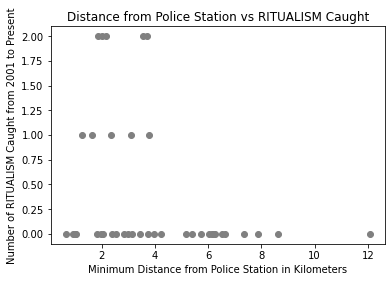

KeyError: 0

In [100]:
# Let's make 1 cell to run everything 
for g in crime['Primary Type'].unique(): 
    crimes = crime.copy()
    crimes = crimes.loc[crimes['Primary Type'] == g]
    crimes.dropna(inplace = True)
    crimes.reset_index(drop=True, inplace = True)
    crime_points = []

    for x in range(len(crimes)):
        crime_points.append(Point(crimes["Longitude"][x], crimes["Latitude"][x]))

    crime_points = gpd.GeoDataFrame(crime_points, geometry = crime_points)

    crime_centroid = []
    for x in range(len(keepers2)):
        crime_centroid.append(keepers2[0][x].centroid)

    crime_centroid = gpd.GeoDataFrame(crime_centroid, geometry = crime_centroid)

    crime_distance = []

    for x in crime_centroid[0]:
        tot = []
        for y in stations["geometry"]:
            tot.append(x.distance(y))
        crime_distance.append(min(tot))

    total_count = []

    for x in keepers2[0]:
        counter = 0
        for y in crime_points[0]:
            if(y.within(x)):
                counter += 1
        total_count.append(counter)

    for x in range(len(crime_distance)):
        crime_distance[x] = crime_distance[x] * 111
    
    print(g)
    
    plt.scatter(crime_distance, total_count, color = "grey")
    plt.xlabel("Minimum Distance from Police Station in Kilometers")
    plt.ylabel("Number of " +  g +  " Caught from 2001 to Present")
    plt.title("Distance from Police Station vs " +  g + " Caught")
    plt.show()

In [101]:
for g in crime["Primary Type"].unique():
    print(g)

BATTERY
THEFT
NARCOTICS
ASSAULT
BURGLARY
ROBBERY
DECEPTIVE PRACTICE
OTHER OFFENSE
CRIMINAL DAMAGE
WEAPONS VIOLATION
CRIMINAL TRESPASS
MOTOR VEHICLE THEFT
SEX OFFENSE
INTERFERENCE WITH PUBLIC OFFICER
OFFENSE INVOLVING CHILDREN
PUBLIC PEACE VIOLATION
PROSTITUTION
GAMBLING
CRIM SEXUAL ASSAULT
LIQUOR LAW VIOLATION
CRIMINAL SEXUAL ASSAULT
ARSON
STALKING
KIDNAPPING
INTIMIDATION
HOMICIDE
CONCEALED CARRY LICENSE VIOLATION
NON - CRIMINAL
HUMAN TRAFFICKING
OBSCENITY
PUBLIC INDECENCY
OTHER NARCOTIC VIOLATION
NON-CRIMINAL
NON-CRIMINAL (SUBJECT SPECIFIED)
RITUALISM
DOMESTIC VIOLENCE


In [102]:
crime_list = crime["Primary Type"].unique()

In [103]:
crime_list = list(crime_list)

In [104]:
crime_list.pop()

'DOMESTIC VIOLENCE'

BATTERY


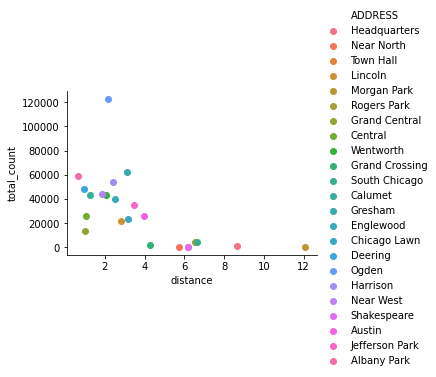

THEFT


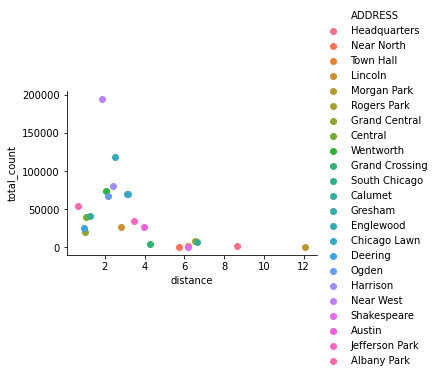

NARCOTICS


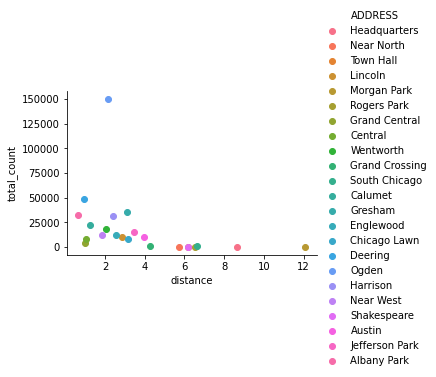

ASSAULT


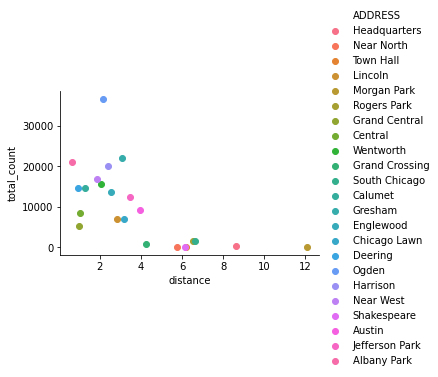

BURGLARY


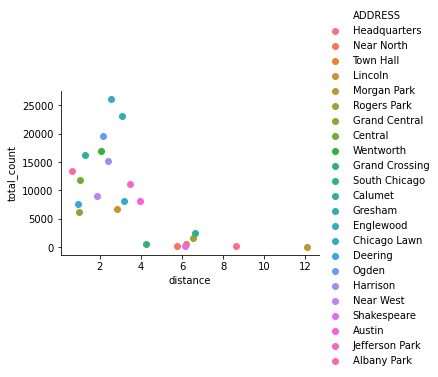

ROBBERY


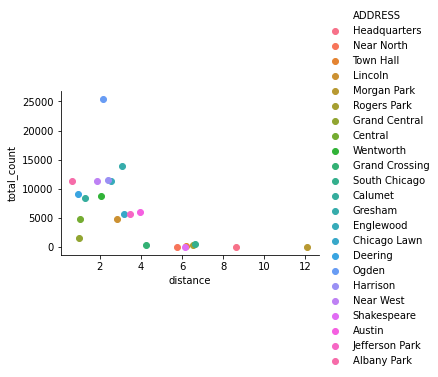

DECEPTIVE PRACTICE


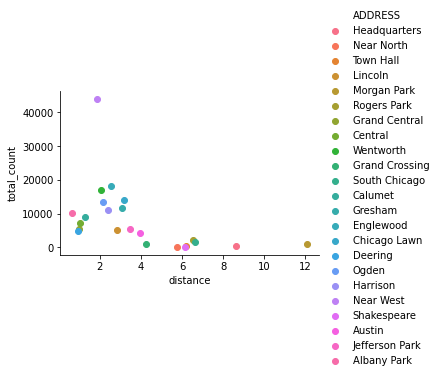

OTHER OFFENSE


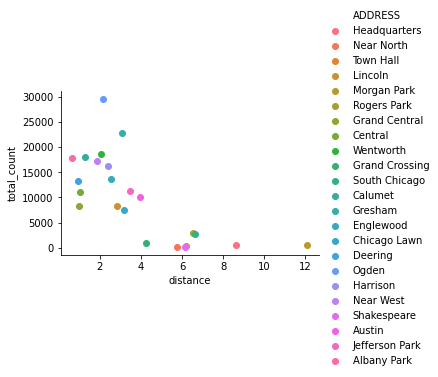

CRIMINAL DAMAGE


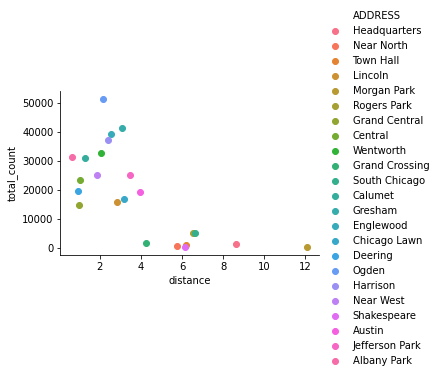

WEAPONS VIOLATION


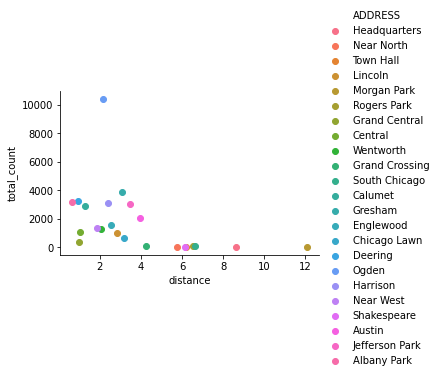

CRIMINAL TRESPASS


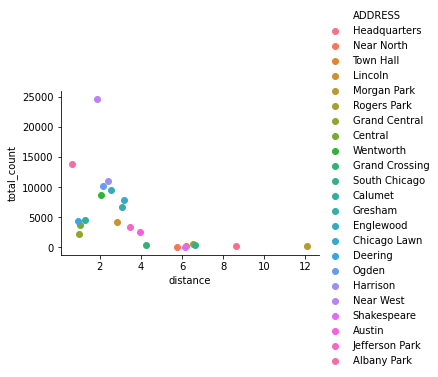

MOTOR VEHICLE THEFT


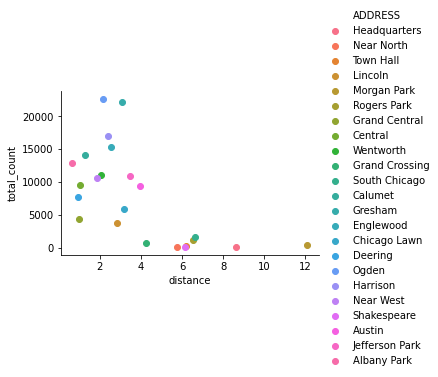

SEX OFFENSE


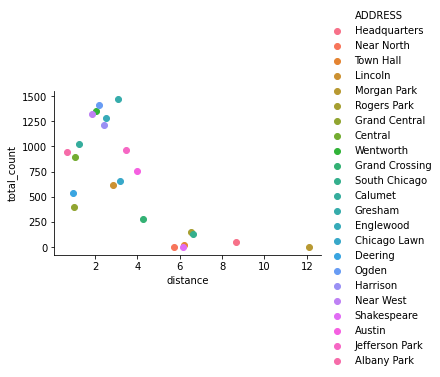

INTERFERENCE WITH PUBLIC OFFICER


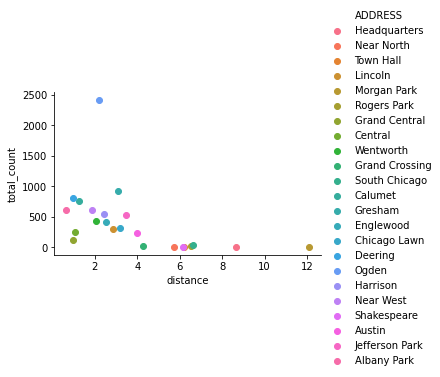

OFFENSE INVOLVING CHILDREN


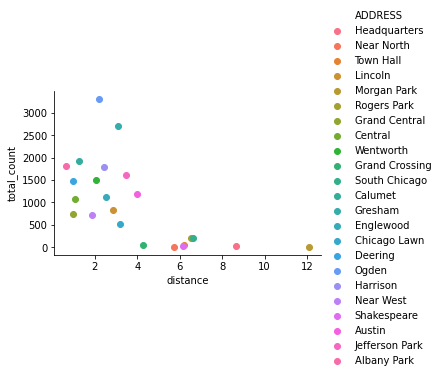

PUBLIC PEACE VIOLATION


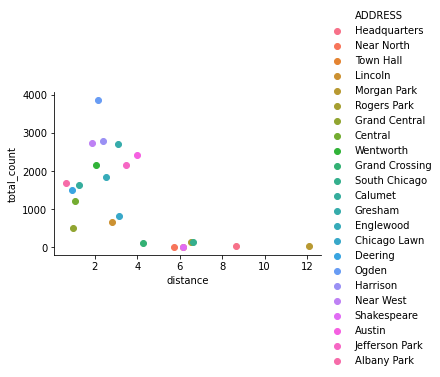

PROSTITUTION


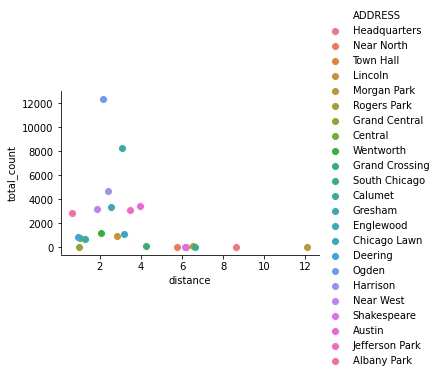

GAMBLING


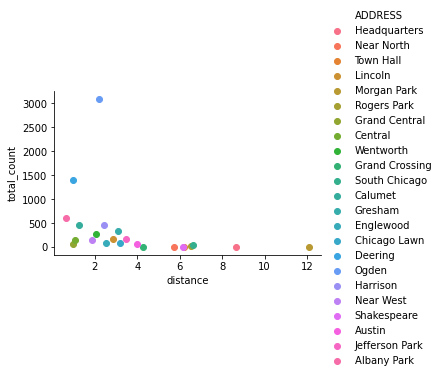

CRIM SEXUAL ASSAULT


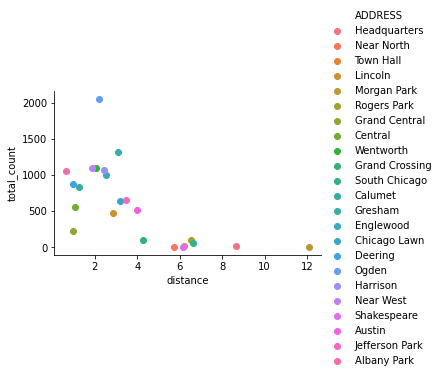

LIQUOR LAW VIOLATION


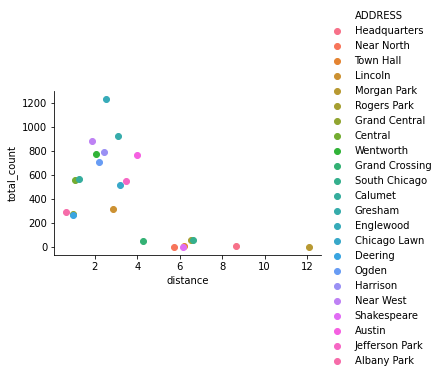

CRIMINAL SEXUAL ASSAULT


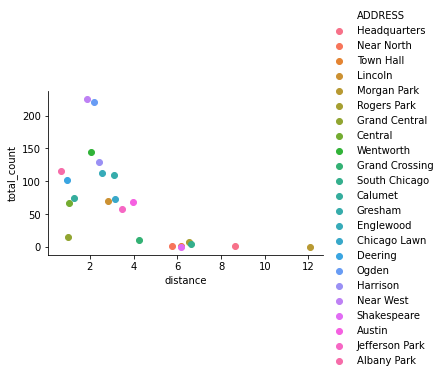

ARSON


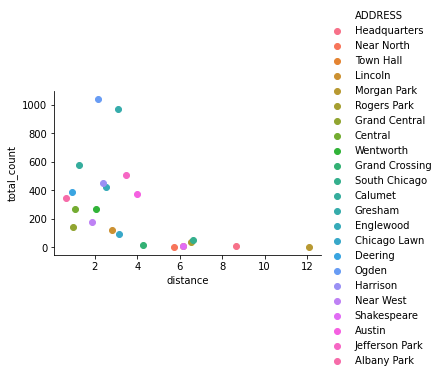

STALKING


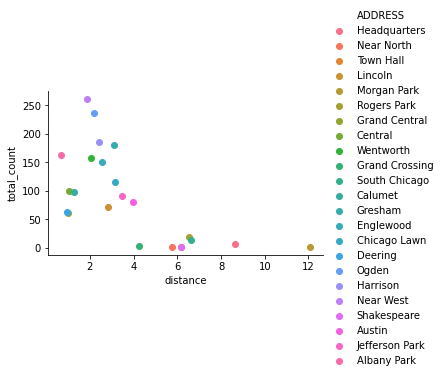

KIDNAPPING


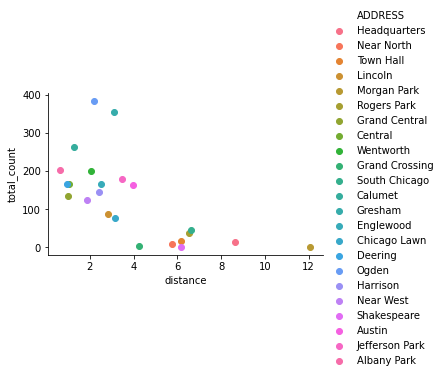

INTIMIDATION


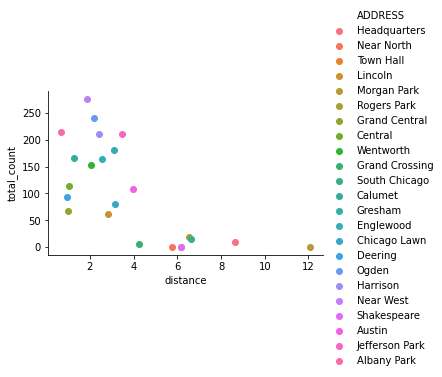

HOMICIDE


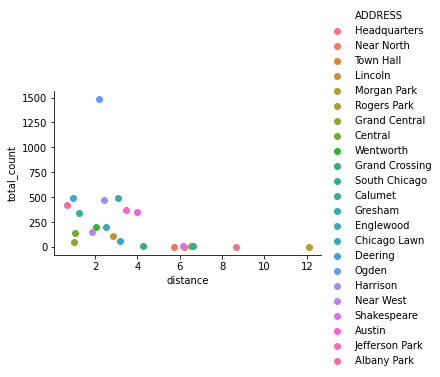

CONCEALED CARRY LICENSE VIOLATION


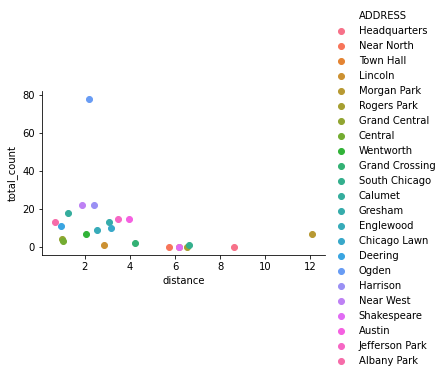

NON - CRIMINAL


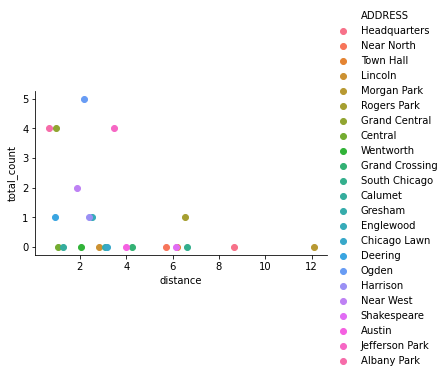

HUMAN TRAFFICKING


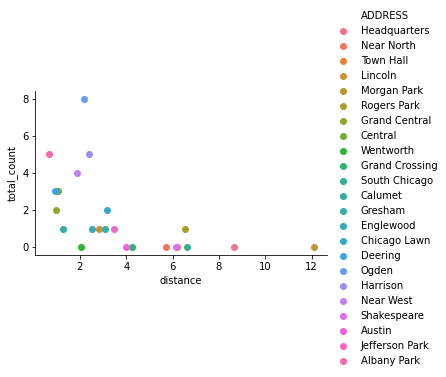

OBSCENITY


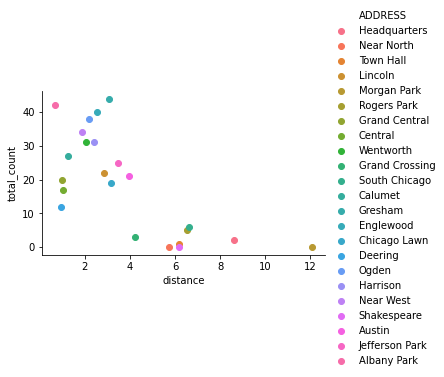

PUBLIC INDECENCY


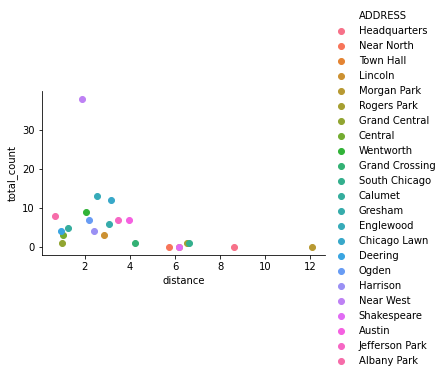

OTHER NARCOTIC VIOLATION


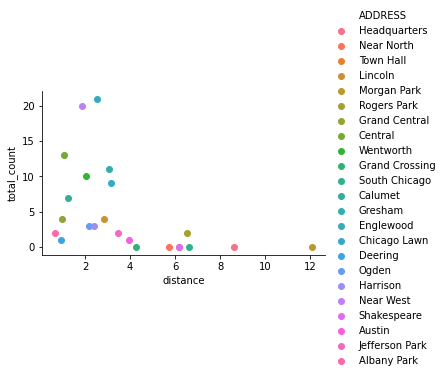

NON-CRIMINAL


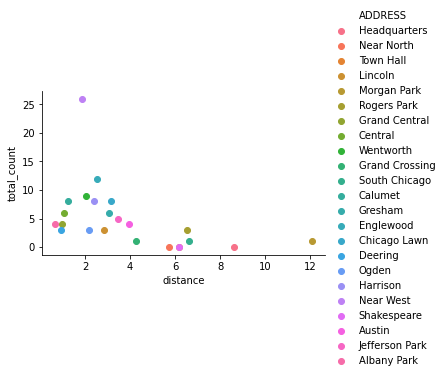

NON-CRIMINAL (SUBJECT SPECIFIED)


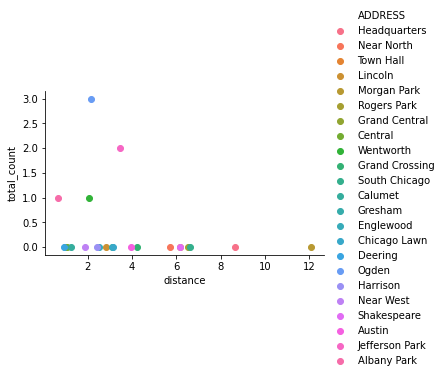

RITUALISM


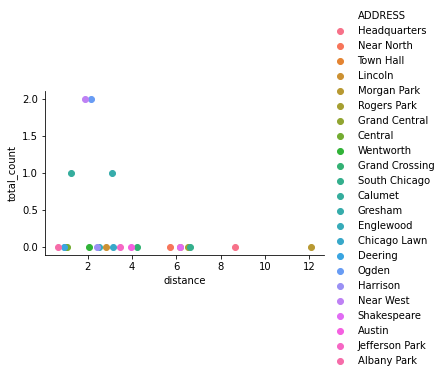

In [108]:
# Let's make 1 cell to run everything 
for g in crime_list: 
    crimes = crime.copy()
    crimes = crimes.loc[crimes['Primary Type'] == g]
    crimes.dropna(inplace = True)
    crimes.reset_index(drop=True, inplace = True)
    crime_points = []

    for x in range(len(crimes)):
        crime_points.append(Point(crimes["Longitude"][x], crimes["Latitude"][x]))

    crime_points = gpd.GeoDataFrame(crime_points, geometry = crime_points)

    crime_centroid = []
    for x in range(len(keepers2)):
        crime_centroid.append(keepers2[0][x].centroid)

    crime_centroid = gpd.GeoDataFrame(crime_centroid, geometry = crime_centroid)

    crime_distance = []

    for x in crime_centroid[0]:
        tot = []
        for y in stations["geometry"]:
            tot.append(x.distance(y))
        crime_distance.append(min(tot))

    total_count = []

    for x in keepers2[0]:
        counter = 0
        for y in crime_points[0]:
            if(y.within(x)):
                counter += 1
        total_count.append(counter)

    for x in range(len(crime_distance)):
        crime_distance[x] = crime_distance[x] * 111
    
    print(g)
    
    reg = pd.DataFrame(crime_distance)
    reg["total_count"] = total_count
    reg["distance"] = crime_distance
    reg["ADDRESS"] = stations["DISTRICT NAME"]
    stat_order = stations["DISTRICT NAME"]
    fg = seaborn.FacetGrid(data=reg, hue='ADDRESS', hue_order=stat_order, aspect=1.61)
    fg.map(plt.scatter, 'distance', 'total_count').add_legend()
    plt.show()